In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Cubic structure
dataset = pd.read_excel('../Data/cubic.xlsx')
X = dataset.iloc[:,1:27].values
y_1 = dataset.iloc[:,27:28].values
identity = np.ones([len(X),1]) * 1
X_1 = np.hstack((X,identity))

# Hexagonal structure
dataset = pd.read_excel('../Data/hexagonal.xlsx')
X = dataset.iloc[:,1:27].values
y_2 = dataset.iloc[:,27:28].values
identity = np.ones([len(X),1]) * 2
X_2 = np.hstack((X,identity))

# Monoclinic structure
dataset = pd.read_excel('../Data/monoclinic.xlsx')
X = dataset.iloc[:,1:27].values
y_3 = dataset.iloc[:,27:28].values
identity = np.ones([len(X),1]) * 3
X_3 = np.hstack((X,identity))

# Orthorhombic structure
dataset = pd.read_excel('../Data/orthorhombic.xlsx')
X = dataset.iloc[:,1:27].values
y_4 = dataset.iloc[:,27:28].values
identity = np.ones([len(X),1]) * 4
X_4 = np.hstack((X,identity))

# Tetragonal structure
dataset = pd.read_excel('../Data/tetragonal.xlsx')
X = dataset.iloc[:,1:27].values
y_5 = dataset.iloc[:,27:28].values
identity = np.ones([len(X),1]) * 5
X_5 = np.hstack((X,identity))

# Triclinic structure
dataset = pd.read_excel('../Data/triclinic.xlsx')
X = dataset.iloc[:,1:27].values
y_6 = dataset.iloc[:,27:28].values
identity = np.ones([len(X),1]) * 6
X_6 = np.hstack((X,identity))

# Trigonal structure
dataset = pd.read_excel('../Data/trigonal.xlsx')
X = dataset.iloc[:,1:27].values
y_7 = dataset.iloc[:,27:28].values
identity = np.ones([len(X),1]) * 7
X_7 = np.hstack((X,identity))

X = np.vstack((X_1,X_2,X_3,X_4,X_5,X_6,X_7))
y = np.vstack((y_1,y_2,y_3,y_4,y_5,y_6,y_7))
doping = X[:,13]
indices_1 = np.where(doping == 1e20)
X1 = X[indices_1,:][0]
y1 = y[indices_1,:][0]
indices_2 = np.where(doping == 1e19)
X2 = X[indices_2,:][0]
y2 = y[indices_2,:][0]
indices_3 = np.where(doping == 1e18)
X3 = X[indices_3,:][0]
y3 = y[indices_3,:][0]
temperature = X3[:,12]
indices_4 = np.where(temperature < 1000)
X3 = X3[indices_4,:][0]
y3 = y3[indices_4,:][0]
X = np.vstack((X1,X2,X3))
y = np.vstack((y1,y2,y3))
indices_5 = np.where(y*(10**-21) >= 1) # Only power factor >= 1
y = np.log10(y[indices_5,:][0])**6
X = X[indices_5,:][0]

In [2]:
# XG Boost regression

# Split the dataset into training set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

from xgboost import XGBRegressor

regressor = XGBRegressor(n_estimators = 319,
                         max_depth = 10,
                         min_child_weight = 10,
                         learning_rate = 0.2,
                         gamma = 1,
                         alpha = 0.75,
                         reg_lambda = 10,
                         scale_pos_weight = 3.4,
                         subsample = 1) # n_estimators refers to the number of trees needed

regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

The MAPE is 21.55 %.


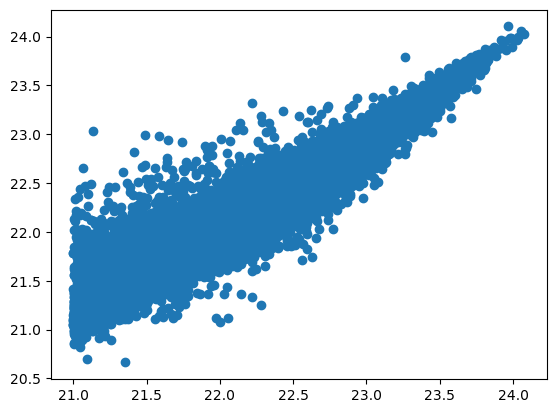

In [3]:
# Plot actual vs predicted and compute MAPE
plt.scatter(y_test**(1/6),y_pred**(1/6))
pred = 10**(y_pred**(1/6))
target = 10**(y_test**(1/6))
total = 0
cnt = 0
for i in range(len(y_pred)):
    total += (abs(target[i] - pred[i])/target[i])*100
    cnt += 1
print("The MAPE is " + str(round((total/cnt)[0],2)) + " %.")

In [4]:
# Save the predicted results
transform_y_pred = 10**(y_pred**(1/6))
transform_y_test = 10**(y_test**(1/6))

import xlsxwriter

workbook = xlsxwriter.Workbook('Full dataset (XGB test results).xlsx') 
worksheet = workbook.add_worksheet()
row = 0
col = 0

actual = transform_y_test.tolist()
prediction = transform_y_pred.tolist()

# Iterate over the data and write it out row by row
for i in range(len(actual)):
    worksheet.write(row, col, actual[i][0])
    worksheet.write(row, col + 1, prediction[i])


    row += 1

workbook.close()